In [1]:
import pandas as pd
import numpy as np
import random as rnd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('PatientInfo.csv')

In [5]:
data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,서울,강서구,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,서울,중랑구,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,서울,종로구,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,서울,마포구,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,서울,성북구,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [6]:
data.columns.values

array(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number',
       'symptom_onset_date', 'confirmed_date', 'released_date',
       'deceased_date', 'state'], dtype=object)

In [7]:
train_df = pd.DataFrame(data, columns = ['age', 'state'])

In [8]:
train_df.head()

,age,state
0,50s,released
1,30s,released
2,50s,released
3,20s,released
4,20s,released


In [9]:
train_df.describe()

,age,state
count,3785,5165
unique,11,3
top,20s,released
freq,899,2929


In [10]:
train_df['state'].unique()

array(['released', 'deceased', 'isolated'], dtype=object)

In [11]:
df = train_df.groupby(['age']).state.value_counts()
df.head()

age   state   
0s    released     36
      isolated     30
100s  released      1
10s   released    115
      isolated     63
Name: state, dtype: int64

In [12]:
train_df.isnull().sum()

age      1380
state       0
dtype: int64

In [13]:
train_df.dropna(inplace = True)

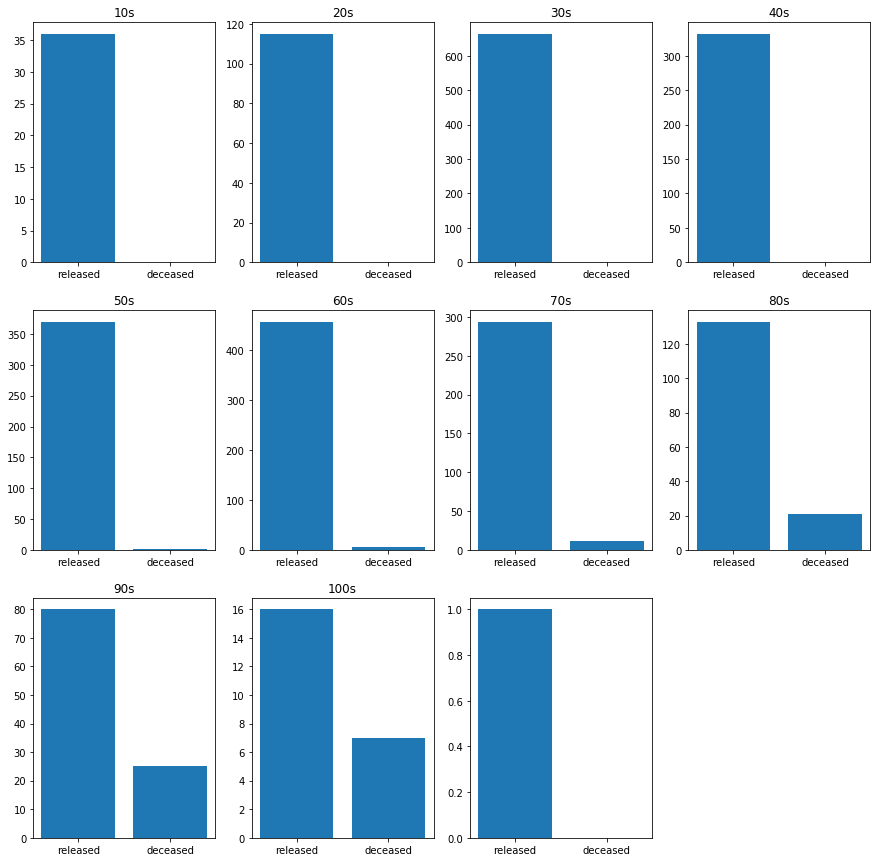

In [14]:
ages = ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', 
        '90s', '100s']
plt.figure(figsize=(15,15))

def TheCountByAge(train):
    i=0
    for age in ages:
        df = train[train['age']==age]
        released = df[df['state']=='released'].state.count()
        deceased = df[df['state']=='deceased'].state.count()
        plt.title(age)
        plt.subplot(3, 4, i+1)
        plt.bar(['released', 'deceased'], [released, deceased])
        i = i+1
    plt.show()

TheCountByAge(train_df)

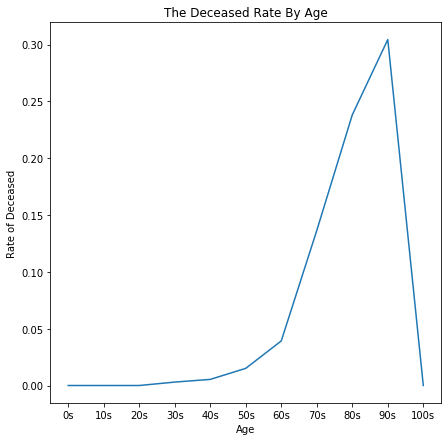

In [15]:
def TheRateByAge(train):
    ages = ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', 
        '90s', '100s']
    rate = []
    for age in ages:
        df = train[train['age']==age]
        released = df[df['state']=='released'].state.count()
        deceased = df[df['state']=='deceased'].state.count()
        rate.append(deceased/(released+deceased))
    plt.figure(figsize=(7,7))
    plt.title('The Deceased Rate By Age')
    plt.xlabel('Age')
    plt.ylabel('Rate of Deceased')
    plt.plot(ages, rate)
    plt.show()

TheRateByAge(train_df)